# NBA trends Project

In this project, I’ll analyze data from the NBA (National Basketball Association) and explore possible associations.

This data was originally sourced from 538’s Analysis of the Complete History Of The NBA and contains the original, unmodified data from Basketball Reference as well as several additional variables 538 added to perform their own analysis.

You can read more about the data and how it’s being used by 538 here. For this project we’ve limited the data to just 5 teams and 10 columns (plus one constructed column, point_diff, the difference between pts and opp_pts).

## Install dependencies and tools
To run this notebook, you need to install the following Python libraries:

- numpy
- pandas
- scipy
- matplotlib
- seaborn

You can install them using pip:

```bash
pip install numpy pandas scipy matplotlib seaborn
```

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# previewing and reading csv file

nba_data = pd.read_csv("modified_nba_games_data.csv")
# creating two data frames, one for 2010, and one for 2014
nba_data_2010 = nba_data[nba_data["year_id"] == 2010]
nba_data_2014 = nba_data[nba_data["year_id"] == 2014]

print(nba_data.head())

        game_id  year_id  fran_id      opp_fran game_location  is_playoffs  \
0  194611010TRH     1947   Knicks       Huskies             A            0   
1  194611020CHS     1947   Knicks         Stags             A            0   
2  194611020PRO     1947  Celtics  Steamrollers             A            0   
3  194611050BOS     1947  Celtics         Stags             H            0   
4  194611070STB     1947   Knicks       Bombers             A            0   

   pts  opp_pts game_result  forecast  point_diff  
0   68       66           W  0.359935           2  
1   47       63           L  0.368899         -16  
2   53       59           L  0.359935          -6  
3   55       57           L  0.620204          -2  
4   68       63           W  0.339290           5  


## Analyzing relationships between Quantitative and Categorical

In this section I am going to analyze and compare the scoring performance of the New York Knicks and Brooklyn Nets during the 2010 NBA season. By extracting the points each team scored in their games from the pts column of the nba_2010 DataFrame, you will create two separate series: one for the Knicks (knicks_pts_10) and one for the Nets (nets_pts_10). This will allow you to directly compare how each team performed in terms of points earned per game.

### Step 1: Selecting and Filtering Relevant Data

In [5]:
nba_data_2010 = nba_data[nba_data["year_id"] == 2010]
nba_data_2014 = nba_data[nba_data["year_id"] == 2014]

knicks_pts_10 = nba_data_2010.pts[nba_data_2010["fran_id"] == "Knicks"]
nets_pts_10 = nba_data_2010.pts[nba_data_2010["fran_id"] == "Nets"]

print(knicks_pts_10)
print(nets_pts_10)

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64
21720     93
21727     85
21730    104
21733     68
21738     94
        ... 
22103     89
22108    127
22113    102
22117     95
22124     86
Name: pts, Length: 82, dtype: int64


### Step 2: Calculating the Mean Difference

The next step involves calculating the mean difference between the points scored per game by the Knicks and the Nets. By comparing the average points for each team, this analysis will assess whether there is a significant association or difference in scoring performance between the two series. This approach provides a quantitative basis for evaluating the relative performance of the teams during the season.


In [25]:
diff_means_2010 = knicks_pts_10.mean() -  nets_pts_10.mean() 
print(diff_means_2010)

9.731707317073173


The calculated mean difference provides insight into whether there is an association between team identity (fran_id) and points scored (pts). If the mean difference is substantial, it suggests that one team consistently scores more points per game than the other, indicating a possible association between the team and its scoring performance. However, if the mean difference is small, it may imply that there is little to no meaningful relationship between the two variables. Based on the Calculated Mean Difference, it is suggesting that there is a huge association between the two variables.

However, to gain deeper insight into the scoring performance of the Knicks and Nets, it is beneficial to examine the full distribution of points scored rather than relying solely on mean values. By creating overlapping histograms for the two teams using the previously generated series, the analysis will reveal whether differences in means are supported by distinct distributions or if the teams exhibit similar scoring patterns. This visualization allows for a more comprehensive comparison, highlighting potential similarities or differences in how points are distributed across games for each team. Observing the histograms will help determine if the distributions appear to be the same or if there are notable distinctions.

### Step 3: Creating Overlapping Histograms to Compare Points Scored by Knicks and Nets

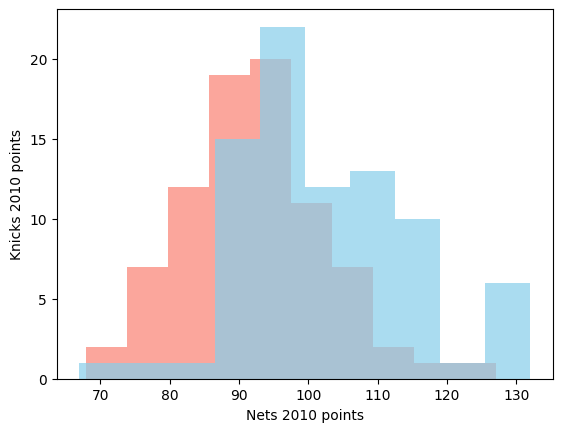

In [ ]:
bins = np.linspace(
    min(knicks_pts_10.min(), nets_pts_10.min()),
    max(knicks_pts_10.max(), nets_pts_10.max()),
    15
)

plt.hist(nets_pts_10, alpha=0.7, color="salmon", label="Nets", bins=bins)
plt.hist(knicks_pts_10, alpha=0.7, color="skyblue", label="Knicks", bins=bins)
plt.xlabel("Points From Teams")
plt.ylabel("Frequency")
plt.legend()

plt.show()


The overlapping histogram indicates that the distributions of points scored by the Knicks and Nets are quite different, suggesting an association between team identity and points scored. The  distinct separation between the two distributions supports the conclusion that differences in scoring performance between these teams are significantly different.

To extend the analysis, it is valuable to compare the scoring performance of the Knicks and Nets in the 2014 NBA season using the nba_2014 DataFrame. By replicating the previous steps—calculating the mean difference in points scored between the two teams and visualizing the distributions with overlapping histograms—it becomes possible to assess whether the difference in points has increased or decreased compared to 2010. This approach provides insight into how the relationship between team identity and scoring performance may have evolved over time, highlighting any changes in competitive dynamics between the Knicks and Nets.

### Step 4: Gathering and Filtering Data (2014 games)

In [8]:
knicks_pts_14 = nba_data_2014.pts[nba_data_2014["fran_id"] == "Knicks"]
nets_pts_14 = nba_data_2014.pts[nba_data_2014["fran_id"] == "Nets"]

print(knicks_pts_14)

23469     90
23473     81
23480    100
23486     97
23490    101
        ... 
23849     91
23863    108
23867    100
23871    109
23875     95
Name: pts, Length: 82, dtype: int64


### Step 5: Calculating the Mean Difference (2014 games)

In [36]:
knicks_pts_14 = nba_data_2014.pts[nba_data_2014["fran_id"] == "Knicks"]
nets_pts_14 = nba_data_2014.pts[nba_data_2014["fran_id"] == "Nets"]

diff_means_2014 = knicks_pts_14.mean() - nets_pts_14.mean()
print(diff_means_2014)

0.44706798131809933


### Step 6: Creating Overlapping Histograms to Compare Points Scored by Knicks and Nets (2014 games)

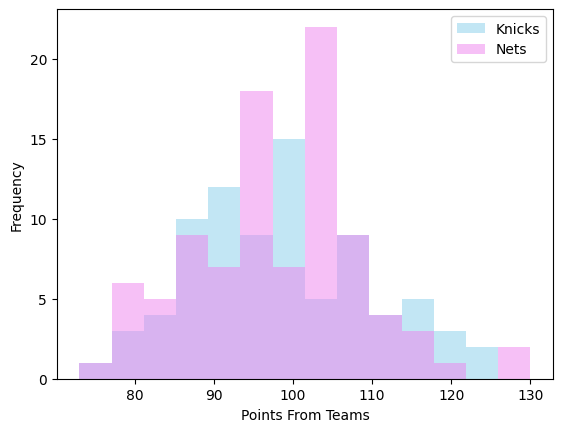

In [22]:
bins = np.linspace(
    min(knicks_pts_14.min(), nets_pts_14.min()),
    max(knicks_pts_14.max(), nets_pts_14.max()),
    15
)

plt.hist(knicks_pts_14, bins=bins, alpha=0.5, color="skyblue", label="Knicks")
plt.hist(nets_pts_14, bins=bins, alpha=0.5, color="violet", label="Nets")
plt.xlabel("Points From Teams")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The analysis shows that the difference in points scored between the Knicks and Nets decreased from 2010 to 2014. The calculated mean difference for 2014 aligns with the observed distributions in the overlapping histograms, indicating that the teams' scoring performances became more similar over time. This reduction in mean difference makes sense given the increased overlap in the distributions, suggesting a narrowing gap in points scored between the two teams during the 2014 season.

The next step involves expanding the analysis to include all teams from the 2010 season only. By generating side-by-side boxplots of points scored per game for each franchise, the visualization will help assess the relationship between team identity and scoring performance. This approach will reveal the extent of overlap between teams, indicate whether franchise and points scored are associated, and highlight any pairs of teams that differ in their average scores per game.

### Step 7: Creating side by side Box-plots to analyze all teams in 2010

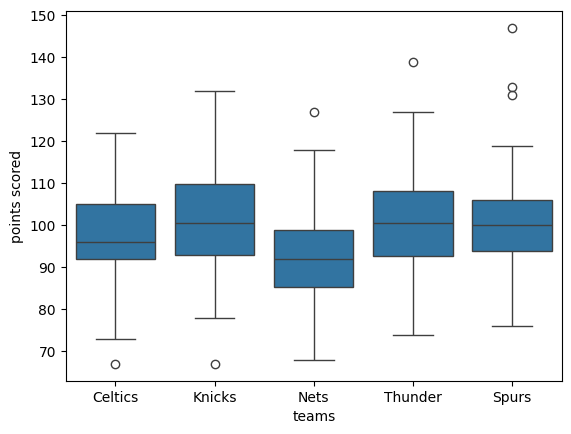

In [48]:
sns.boxplot(data=nba_data_2010, x=nba_data_2010.fran_id, y=nba_data_2010.pts)
plt.xlabel("teams")
plt.ylabel("points scored")
plt.show()

The side-by-side boxplots reveal that while there is considerable overlap among many of the teams' boxes, indicating similar scoring ranges, the chart still suggests an association between franchise identity (fran_id) and points scored (pts). Notably, some pairs of teams, such as the Nets and Celtics, display more pronounced differences in their average scores per game, as evidenced by the separation between their boxes. This indicates that, despite the overlap, certain franchises consistently achieve higher or lower point totals, reinforcing the relationship between team and scoring performance.

## Analyzing relationships between Categorical variables

This section focuses on investigating whether teams are more likely to win games when playing at home compared to away. By analyzing the variables game_result (indicating win or loss) and game_location (indicating home or away), the goal is to determine if there is a relationship between game location and the likelihood of winning. This analysis will provide insight into the impact of home-court advantage on team performance.

### Step 1: Creating a Contingency Table of Frequencies

In [49]:
location_result_frequency = pd.crosstab(nba_data.game_result, nba_data.game_location)
print(location_result_frequency)

game_location     A     H  N
game_result                 
L              7105  4298  3
W              5003  7942  8


Based on the results of the contingency table, there appears to be an association between game location and game result. The distribution of wins and losses differs depending on whether teams are playing at home or away, suggesting that these variables are related.


The next step involves converting the contingency table of frequencies into a table of proportions. This transformation will allow for a clearer comparison of the relationship between game location and game result by expressing the data as relative frequencies, making it easier to interpret and analyze patterns across categories.

### Step 2: Converting the Contingecy tables of frequencies into proportions

In [50]:
location_result_proportions = location_result_frequency/len(nba_data)
print(location_result_proportions)

game_location         A         H         N
game_result                                
L              0.291679  0.176444  0.000123
W              0.205386  0.326040  0.000328


The table of proportions reveals significant differences in game outcomes based on location. A large proportion of games are won at home, while a substantial number of losses occur away. This pattern highlights a strong relationship between game location and result, suggesting that teams are much more likely to win when playing at home compared to away.

For the final step in this section, the analysis will focus on calculating the expected contingency table under the assumption of no association between game location and game result. Additionally, the Chi-Square statistic will be computed to quantitatively assess whether the observed differences are statistically significant. This approach provides a formal test for the relationship between the two categorical variables.



### Step 3: Creating Expected Contingency Table and Chi-Square Statistic

In [54]:
chi2, pval, dof, expected = chi2_contingency(location_result_frequency)
print(expected)

[[5.66952042e+03 5.73132887e+03 5.15070405e+00]
 [6.43847958e+03 6.50867113e+03 5.84929595e+00]]


The comparison between the expected contingency table and the actual observed table reveals noticeable differences. The actual table deviates from what would be expected if there were no association between game location and game result. This discrepancy suggests that there is indeed a relationship between these two variables, with the observed outcomes not aligning with the assumption of independence. The results support the conclusion that game location and game result are associated.

## Analyzing Relationships Between Quantitative Variables

Analyzing relationships between quantitative variables marks the final stage of this data analysis. In this section, the focus is on examining whether teams with a higher probability of winning—calculated by 538 for each game—also tend to win by larger point margins. This analysis will help determine if predicted win probabilities are associated with actual game outcomes in terms of points differential.

The first step in this analysis is to calculate the covariance between the probability of winning and the point differential for each game. This measure will help determine whether there is a tendency for teams with higher predicted win probabilities to also achieve larger margins of victory.

### Step one: Calculating the Covariance

In [56]:
point_diff_forecast_cov = np.cov(nba_data_2010.forecast, nba_data_2010.point_diff)
print(point_diff_forecast_cov)

[[5.22668307e-02 1.37461257e+00]
 [1.37461257e+00 1.86559287e+02]]


The covariance matrix indicates that there is a relationship between the probability of winning and the point differential. The presence of a non-zero covariance suggests that as the predicted probability of winning increases, the margin by which teams win also tends to increase, supporting the idea of an association between these two variables.

The final step in this analysis is to create a scatter plot of the data. This visualization will help further assess the association between the probability of winning and the point differential by illustrating how these variables relate to each other across individual games.

### Step 3: Creating a Scatter Plot

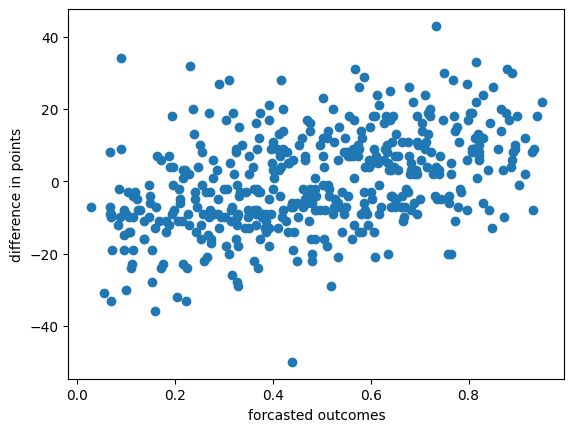

In [57]:
plt.scatter(nba_data_2010.forecast, nba_data_2010.point_diff)
plt.xlabel("forcasted outcomes")
plt.ylabel("difference in points")
plt.show()

The correlation values are consistent with the scatter plot, which suggests a modest relationship between the forecasted probability of winning and the actual point difference. The graph indicates that while there is some association, it is not particularly strong, aligning with the observed correlation results.

# Conclusion

In conclusion, this analysis explored various relationships within NBA game data, including team performance, game location, and win probabilities. The results indicate that team identity and game location are both associated with points scored and game outcomes, with home teams tending to win more often. Additionally, while there is some relationship between forecasted win probabilities and actual point differentials, the association is modest. Overall, the study highlights the value of statistical analysis in understanding factors that influence game results and team performance in professional basketball.
